In [1]:
from src import esma

In [2]:
def init_model():
    model = esma.project(project_id='Fe_TB2J')
    model.set_pseudo(path="/scratch/s.sevim/espresso-machine/Pseudopotentials/PBE/US")
    model.get_structure(format="poscar",path="/scratch/s.sevim/espresso-machine/Structures/Fe.poscar")
    model.set_cores(64)
    model.ecutwfc(100) #Set wavefunction cutoff
    model.ecutrho(1000) #Set wavefunction cutoff
    model.k_points([6,6,6]) #Set number of k points
    model.degauss(0.01) #Set degauss value
    model.conv_thr(1e-8) #Set convergence threshold
    model.smearing('mv')
    model.mixing_beta(0.2)
    model.electron_maxstep(500) #Max number of electron iteration
    model.exchange_maxstep(500) #Max number of exchange iteration
    model.mixing_mode('local-TF')
    model.etot_conv_thr(10**-5)
    model.forc_conv_thr(10**-4)
    return model

In [3]:
model = init_model()

In [4]:
fm = model.magnetize(magnetic_atom='Fe')[0]

In [5]:
fm.optimize(calculation='vc-relax',max_iter=1)

Starting vc-relax iteration 1 
vc-relax for fm is started
vc-relax for fm is finished
vc-relax is converged after 1 steps


In [6]:
fm.calculate('scf')

scf for fm is started
scf for fm is finished


In [7]:
path = ['GAMMA','H','P','GAMMA','N','P','N','H'] #define corners
num_points = 40 #number of points
fm.band_points(path,num_points) #define path

bands for fm is started
bands for fm is finished
bands-pp for fm is started
bands-pp for fm is finished


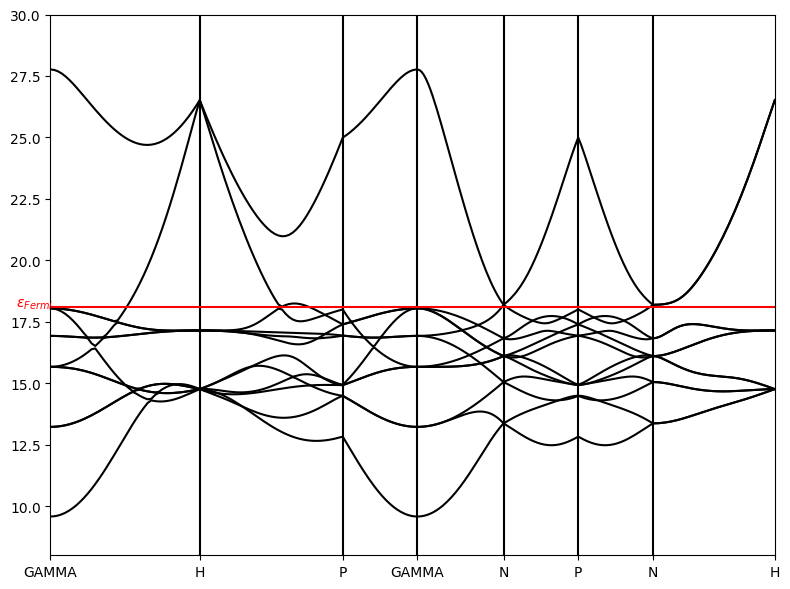

In [8]:
fm.calculate('bands')
fm.plot('electron',ylim=[8,30]) #plot electron bands

In [9]:
fm.scdm_mu(fm.fermi_energy())
fm.scdm_sigma(2)

In [10]:
fm.nosym(True)
fm.k_points([8,8,8],grid=True) #k mesh 
fm.calculate('nscf')

nscf for fm is started
nscf for fm is finished


In [12]:
fm.calculate('wannier90')

wannier90 for fm is started
wannier90 for fm is finished


FileNotFoundError: ./Projects/Fe_TB2J/fm/fm_band.dat not found.

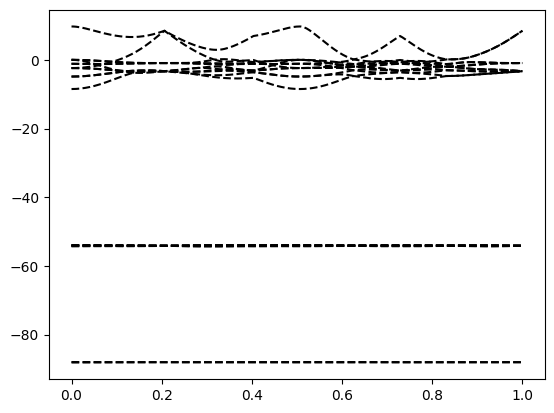

In [15]:
fm.plot(calculation='wannier90',ylim=[-10,10])